# Modelo con los modelos obtenidos con BoW

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, roc_curve, roc_auc_score, auc
import scipy.stats as st
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler

from scipy import sparse

In [2]:
X_train = sparse.load_npz("./Data/X_train_BoW.npz")
X_test = sparse.load_npz("./Data/X_test_BoW.npz")
y_train = pd.read_csv("./Data/y_train.csv", header=None)
y_test = pd.read_csv("./Data/y_test.csv", header=None)

In [3]:
y_train = y_train[0]
y_test = y_test[0]

In [4]:
BoW_NB = joblib.load('./Modelos/BoW/BoW_NB.sav')
BoW_LR = joblib.load('./Modelos/BoW/BoW_LR.sav')
BoW_RF = joblib.load('./Modelos/BoW/BoW_RF.sav')
BoW_AB = joblib.load('./Modelos/BoW/BoW_AB.sav')
BoW_XGB = joblib.load('./Modelos/BoW/BoW_XGB.sav')
BoW_LGBM = joblib.load('./Modelos/BoW/BoW_LGBM_optimizado.sav')

In [5]:
X_train_probas = pd.DataFrame()
X_test_probas = pd.DataFrame()

In [6]:
X_train_probas['BoW_NB'] = BoW_NB.predict_proba(X_train)[:,1]
X_train_probas['BoW_LR'] = BoW_LR.predict_proba(X_train)[:,1]
X_train_probas['BoW_RF'] = BoW_RF.predict_proba(X_train)[:,1]
X_train_probas['BoW_AB'] = BoW_AB.predict_proba(X_train)[:,1]
X_train_probas['BoW_XGB'] = BoW_XGB.predict_proba(X_train.astype('float32'))[:,1]
X_train_probas['BoW_LGBM'] = BoW_LGBM.predict_proba(X_train.astype('float32'))[:,1]

In [7]:
X_test_probas['BoW_NB'] = BoW_NB.predict_proba(X_test)[:,1]
X_test_probas['BoW_LR'] = BoW_LR.predict_proba(X_test)[:,1]
X_test_probas['BoW_RF'] = BoW_RF.predict_proba(X_test)[:,1]
X_test_probas['BoW_AB'] = BoW_AB.predict_proba(X_test)[:,1]
X_test_probas['BoW_XGB'] = BoW_XGB.predict_proba(X_test.astype('float32'))[:,1]
X_test_probas['BoW_LGBM'] = BoW_LGBM.predict_proba(X_test.astype('float32'))[:,1]

## Volvemos a BoW + features a mano

In [8]:
X_train_probas

,BoW_NB,BoW_LR,BoW_RF,BoW_AB,BoW_XGB,BoW_LGBM
0,4.422617e-60,2.147325e-17,0.131225,0.068444,2.134617e-07,6.061160e-11
1,3.723391e-08,2.026344e-06,0.418402,0.427136,5.530229e-04,2.031097e-05
2,1.030540e-03,1.564460e-03,0.487873,0.396353,2.707792e-02,2.114710e-02
3,2.166319e-09,9.020715e-07,0.427063,0.336293,3.829947e-03,1.368540e-04
4,5.092873e-07,2.133584e-05,0.417383,0.390689,6.467583e-03,2.253614e-04
5,2.244122e-03,1.501567e-03,0.472898,0.441448,1.179970e-02,3.670196e-03
6,3.107619e-05,3.478532e-04,0.463346,0.394902,8.937730e-03,2.440968e-03
7,6.237349e-03,5.657708e-03,0.488170,0.485711,2.179531e-02,8.373452e-03
8,1.558747e-02,6.662352e-02,0.503624,0.492898,3.791789e-02,6.831737e-02
9,2.898405e-02,2.948074e-02,0.502285,0.489783,2.503549e-02,2.559204e-02


In [10]:
X_train_comp = pd.read_csv('./Data/train_comportamiento.csv')
X_test_comp = pd.read_csv('./Data/test_comportamiento.csv')

In [11]:
X_train_comp

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,conversation_id,message_line,author,time,text,Label,char_count,...,word_density,punctuation_count,upper_case_word_count,title_word_count,questions,noun_count,verb_count,adj_count,adv_count,pron_count
0,0,0,0,affc2df0951b733d14ba92d19d9b7695,1,0a39f78bcb297ab0ebe8a29c28bfed89,15:24,bugmail: [Bug 6978] New: Mark eof-terminated s...,0,156,...,13.000000,22,0,3,0,10,2,2,0,0
1,1,1,0,affc2df0951b733d14ba92d19d9b7695,2,60659cfda992013e610f285c46692d28,15:32,"Henri, can I ask you a Firefox build question ...",0,56,...,5.090909,4,1,4,1,4,1,1,0,2
2,2,2,0,affc2df0951b733d14ba92d19d9b7695,3,b8810fee2f4a71f849f3f7409546d1d9,15:34,"60659cfda992013e610f285c46692d28: sure, but I ...",0,76,...,7.600000,3,1,1,0,1,2,1,2,1
3,3,3,0,affc2df0951b733d14ba92d19d9b7695,4,60659cfda992013e610f285c46692d28,15:35,"It appears the build runs through, it creates ...",0,71,...,5.461538,3,0,1,0,3,3,0,0,2
4,4,4,0,affc2df0951b733d14ba92d19d9b7695,5,60659cfda992013e610f285c46692d28,15:35,"when I start it, I get my standard install of ...",0,68,...,4.857143,8,3,2,0,2,2,1,2,4
5,5,5,0,affc2df0951b733d14ba92d19d9b7695,6,60659cfda992013e610f285c46692d28,15:35,"Same if I make a package, unzip it, and start ...",0,59,...,4.538462,5,1,2,0,2,1,1,2,2
6,6,6,0,affc2df0951b733d14ba92d19d9b7695,7,b8810fee2f4a71f849f3f7409546d1d9,15:35,60659cfda992013e610f285c46692d28: do you alrea...,0,77,...,7.700000,2,0,1,1,1,3,1,1,1
7,7,7,0,affc2df0951b733d14ba92d19d9b7695,8,60659cfda992013e610f285c46692d28,15:35,Likely,0,6,...,3.000000,0,0,1,0,0,0,1,0,0
8,8,8,0,affc2df0951b733d14ba92d19d9b7695,9,60659cfda992013e610f285c46692d28,15:36,So do I need to close all instances?,0,36,...,4.000000,1,1,2,1,1,3,0,1,1
9,9,9,0,affc2df0951b733d14ba92d19d9b7695,10,60659cfda992013e610f285c46692d28,15:36,...other...,0,11,...,5.500000,6,0,0,0,0,0,1,0,0


In [12]:
X_train_comp.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'conversation_id', 'author', 'time', 'text', 'Label'], axis = 1, inplace = True)
X_test_comp.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1' , 'conversation_id', 'author', 'time', 'text', 'Label'], axis = 1, inplace = True)

In [12]:
X_train = pd.concat([X_train_probas, X_train_comp], axis=1)
X_test = pd.concat([X_test_probas, X_test_comp], axis=1)

In [13]:
X_train

,BoW_NB,BoW_LR,BoW_RF,BoW_AB,BoW_XGB,BoW_LGBM,message_line,char_count,word_count,word_density,punctuation_count,upper_case_word_count,title_word_count,questions,noun_count,verb_count,adj_count,adv_count,pron_count
0,4.422617e-60,2.147325e-17,0.131225,0.068444,2.134617e-07,6.061160e-11,1,156,11,13.000000,22,0,3,0,10,2,2,0,0
1,3.723391e-08,2.026344e-06,0.418402,0.427136,5.530229e-04,2.031097e-05,2,56,10,5.090909,4,1,4,1,4,1,1,0,2
2,1.030540e-03,1.564460e-03,0.487873,0.396353,2.707792e-02,2.114710e-02,3,76,9,7.600000,3,1,1,0,1,2,1,2,1
3,2.166319e-09,9.020715e-07,0.427063,0.336293,3.829947e-03,1.368540e-04,4,71,12,5.461538,3,0,1,0,3,3,0,0,2
4,5.092873e-07,2.133584e-05,0.417383,0.390689,6.467583e-03,2.253614e-04,5,68,13,4.857143,8,3,2,0,2,2,1,2,4
5,2.244122e-03,1.501567e-03,0.472898,0.441448,1.179970e-02,3.670196e-03,6,59,12,4.538462,5,1,2,0,2,1,1,2,2
6,3.107619e-05,3.478532e-04,0.463346,0.394902,8.937730e-03,2.440968e-03,7,77,9,7.700000,2,0,1,1,1,3,1,1,1
7,6.237349e-03,5.657708e-03,0.488170,0.485711,2.179531e-02,8.373452e-03,8,6,1,3.000000,0,0,1,0,0,0,1,0,0
8,1.558747e-02,6.662352e-02,0.503624,0.492898,3.791789e-02,6.831737e-02,9,36,8,4.000000,1,1,2,1,1,3,0,1,1
9,2.898405e-02,2.948074e-02,0.502285,0.489783,2.503549e-02,2.559204e-02,10,11,1,5.500000,6,0,0,0,0,0,1,0,0


In [14]:
se = StandardScaler()
X_train = se.fit_transform(X_train)
X_test = se.transform(X_test)

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\juan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [26]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.368244,-0.404654,-6.969304,-5.373295,-0.583326,-0.460968,-0.883841,1.806759,0.527078,0.995261,0.804119,-0.087799,1.873765,-0.043960,1.334529,0.464689,1.428703,-0.435730,-0.388830
1,-0.368244,-0.404621,-1.238909,-0.340556,-0.570526,-0.460597,-0.823258,0.335471,0.429514,0.114300,0.063936,0.298969,2.577748,0.154973,0.308935,-0.010777,0.511969,-0.435730,1.282059
2,-0.360902,-0.379483,0.147341,-0.772474,0.043607,-0.074334,-0.762675,0.629728,0.331950,0.393777,0.022815,0.298969,0.465798,-0.043960,-0.203862,0.464689,0.511969,1.710934,0.446615
3,-0.368244,-0.404640,-1.066085,-1.615163,-0.494655,-0.458466,-0.702092,0.556164,0.624641,0.155583,0.022815,-0.087799,0.465798,-0.043960,0.138003,0.940156,-0.404764,-0.435730,1.282059
4,-0.368240,-0.404311,-1.259236,-0.851937,-0.433586,-0.456848,-0.641509,0.512025,0.722205,0.088262,0.228421,1.072505,1.169782,-0.043960,-0.032930,0.464689,0.511969,1.710934,2.952949
5,-0.352257,-0.380495,-0.151475,-0.139746,-0.310131,-0.393866,-0.580926,0.379609,0.624641,0.052765,0.105058,0.298969,1.169782,-0.043960,-0.032930,-0.010777,0.511969,1.710934,1.282059
6,-0.368023,-0.399057,-0.342070,-0.792833,-0.376394,-0.416340,-0.520343,0.644441,0.331950,0.404916,-0.018306,-0.087799,0.465798,0.154973,-0.203862,0.940156,0.511969,0.637602,0.446615
7,-0.323808,-0.313627,0.153269,0.481298,-0.078701,-0.307876,-0.459760,-0.400173,-0.448558,-0.118598,-0.100549,-0.087799,0.465798,-0.043960,-0.374794,-0.486243,0.511969,-0.435730,-0.388830
8,-0.257196,0.667251,0.461630,0.582127,0.294586,0.788084,-0.399177,0.041213,0.234387,-0.007212,-0.059427,0.298969,1.169782,0.154973,-0.203862,0.940156,-0.404764,0.637602,0.446615
9,-0.161756,0.069661,0.434926,0.538426,-0.003681,0.006933,-0.338594,-0.326609,-0.448558,0.159867,0.146179,-0.087799,-0.238185,-0.043960,-0.374794,-0.486243,0.511969,-0.435730,-0.388830


In [17]:
params = {'C': [0.01, 0.1, 1, 10, 100] }

In [24]:
model = GridSearchCV(LogisticRegression(), params, scoring='roc_auc', verbose= 10, n_jobs=-1, cv=3)
print (model)
result = model.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.5, 0.6, 0.7, 0.8]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc',
       verbose=10)
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:  1.2min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:  1.2min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:  1.6min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:  2.0min remaining:   39.3s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  2.5min finished
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
print ("Mejor Modelo: ",result.best_estimator_)
print ("AUC: ",result.best_score_)
y_pred = result.predict(X_test)
print ("Matriz de Confusión:\n",confusion_matrix(y_test, y_pred))
print ("Accuracy: ",accuracy_score(y_test, y_pred))
print ("Recall: ",recall_score(y_test, y_pred))
print ("Precision: ",precision_score(y_test, y_pred),"\n")
y_probs = result.predict_proba(X_test)[:,1]

Mejor Modelo:  LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
AUC:  0.9043078881323112
Matriz de Confusión:
 [[599612   1898]
 [ 18176   1687]]
Accuracy:  0.967694122531877
Recall:  0.08493178271157428
Precision:  0.4705718270571827 



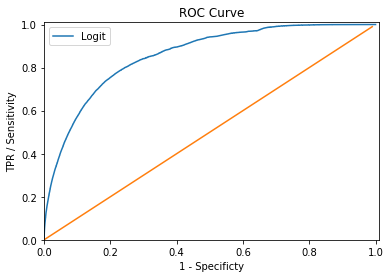

In [29]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_probs)

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_log,tpr_log)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['Logit'])
plt.show()

In [30]:
print('AUC-Logit=', auc(fpr_log, tpr_log))

AUC-Logit= 0.8572296845584906


In [31]:
joblib.dump(result, './Modelos/Ensamble/Ensamble_BoW-Comp_LR.sav')

['./Modelos/Ensamble/Ensamble_BoW-Comp_LR.sav']

In [32]:
X_train.to_csv("./Data/X_train_ensamble.csv", index=False )
X_test.to_csv("./Data/X_test_ensamble.csv", index=False )

## Y la última: Resultados BoW + Resultados a mano

In [9]:
Otros_NB = joblib.load('./Modelos/Otros/Otros_NB.sav')
Otros_LR = joblib.load('./Modelos/Otros/Otros_LR.sav')
Otros_RF = joblib.load('./Modelos/Otros/Otros_RF.sav')
Otros_AB = joblib.load('./Modelos/Otros/Otros_AB.sav')
Otros_XGB = joblib.load('./Modelos/Otros/Otros_XGB.sav')
Otros_LGBM = joblib.load('./Modelos/Otros/Otros_LGBM.sav')

In [14]:
X_train_probas_2 = pd.DataFrame()
X_test_probas_2 = pd.DataFrame()

In [20]:
from sklearn.preprocessing import StandardScaler
se = StandardScaler()
X_train_comp_se = se.fit_transform(X_train_comp)
X_test_comp_se = se.transform(X_test_comp)

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\juan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [21]:
X_train_probas_2['Otros_NB'] = Otros_NB.predict_proba(X_train_comp_se)[:,1]
X_train_probas_2['Otros_LR'] = Otros_LR.predict_proba(X_train_comp_se)[:,1]
X_train_probas_2['Otros_RF'] = Otros_RF.predict_proba(X_train_comp_se)[:,1]
X_train_probas_2['Otros_AB'] = Otros_AB.predict_proba(X_train_comp_se)[:,1]
X_train_probas_2['Otros_XGB'] = Otros_XGB.predict_proba(X_train_comp_se.astype('float32'))[:,1]
X_train_probas_2['Otros_LGBM'] = Otros_LGBM.predict_proba(X_train_comp_se.astype('float32'))[:,1]

In [22]:
X_test_probas_2['Otros_NB'] = Otros_NB.predict_proba(X_test_comp_se)[:,1]
X_test_probas_2['Otros_LR'] = Otros_LR.predict_proba(X_test_comp_se)[:,1]
X_test_probas_2['Otros_RF'] = Otros_RF.predict_proba(X_test_comp_se)[:,1]
X_test_probas_2['Otros_AB'] = Otros_AB.predict_proba(X_test_comp_se)[:,1]
X_test_probas_2['Otros_XGB'] = Otros_XGB.predict_proba(X_test_comp_se.astype('float32'))[:,1]
X_test_probas_2['Otros_LGBM'] = Otros_LGBM.predict_proba(X_test_comp_se.astype('float32'))[:,1]

In [23]:
X_train_2 = pd.concat([X_train_probas, X_train_probas_2], axis=1)
X_test_2 = pd.concat([X_test_probas, X_test_probas_2], axis=1)

In [24]:
X_train_2

,BoW_NB,BoW_LR,BoW_RF,BoW_AB,BoW_XGB,BoW_LGBM,Otros_NB,Otros_LR,Otros_RF,Otros_AB,Otros_XGB,Otros_LGBM
0,4.422617e-60,2.147325e-17,0.131225,0.068444,2.134617e-07,6.061160e-11,0.001152,1.680907e-08,0.003336,0.034233,0.000129,0.000015
1,3.723391e-08,2.026344e-06,0.418402,0.427136,5.530229e-04,2.031097e-05,0.000533,5.981970e-04,0.122834,0.410415,0.001481,0.000385
2,1.030540e-03,1.564460e-03,0.487873,0.396353,2.707792e-02,2.114710e-02,0.002611,6.992479e-04,0.015672,0.190382,0.000379,0.000220
3,2.166319e-09,9.020715e-07,0.427063,0.336293,3.829947e-03,1.368540e-04,0.001530,2.801989e-03,0.074846,0.409439,0.001172,0.001497
4,5.092873e-07,2.133584e-05,0.417383,0.390689,6.467583e-03,2.253614e-04,0.002611,3.762711e-03,0.217875,0.416270,0.018202,0.002175
5,2.244122e-03,1.501567e-03,0.472898,0.441448,1.179970e-02,3.670196e-03,0.001941,5.157473e-03,0.175855,0.431388,0.002641,0.003181
6,3.107619e-05,3.478532e-04,0.463346,0.394902,8.937730e-03,2.440968e-03,0.011478,7.394705e-04,0.007794,0.034029,0.000162,0.000069
7,6.237349e-03,5.657708e-03,0.488170,0.485711,2.179531e-02,8.373452e-03,0.011892,1.294133e-02,0.210141,0.435236,0.005983,0.005116
8,1.558747e-02,6.662352e-02,0.503624,0.492898,3.791789e-02,6.831737e-02,0.009667,1.292053e-02,0.350279,0.432150,0.005245,0.003273
9,2.898405e-02,2.948074e-02,0.502285,0.489783,2.503549e-02,2.559204e-02,0.005217,1.119304e-02,0.345412,0.455535,0.031302,0.052383


In [25]:
se = StandardScaler()
X_train_2 = se.fit_transform(X_train_2)
X_test_2 = se.transform(X_test_2)

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\juan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
X_train_2 = pd.DataFrame(X_train_2)
X_test_2 = pd.DataFrame(X_test_2)

In [27]:
X_train_2

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.368244,-0.404654,-6.969304,-5.373295,-0.583326,-0.460968,-1.025818,-0.824490,-1.415910,-3.782385,-0.614844,-0.600635
1,-0.368244,-0.404621,-1.238909,-0.340556,-0.570526,-0.460597,-1.050124,-0.804904,-0.925956,0.023486,-0.581645,-0.591819
2,-0.360902,-0.379483,0.147341,-0.772474,0.043607,-0.074334,-0.968546,-0.801596,-1.365328,-2.202610,-0.608708,-0.595756
3,-0.368244,-0.404640,-1.066085,-1.615163,-0.494655,-0.458466,-1.010985,-0.732746,-1.122713,0.013612,-0.589236,-0.565280
4,-0.368240,-0.404311,-1.259236,-0.851937,-0.433586,-0.456848,-0.968546,-0.701290,-0.536278,0.082722,-0.171199,-0.549095
5,-0.352257,-0.380495,-0.151475,-0.139746,-0.310131,-0.393866,-0.994836,-0.655621,-0.708564,0.235672,-0.553172,-0.525067
6,-0.368023,-0.399057,-0.342070,-0.792833,-0.376394,-0.416340,-0.620482,-0.800279,-1.397629,-3.784454,-0.614041,-0.599358
7,-0.323808,-0.313627,0.153269,0.481298,-0.078701,-0.307876,-0.604227,-0.400757,-0.567990,0.274601,-0.471146,-0.478904
8,-0.257196,0.667251,0.461630,0.582127,0.294586,0.788084,-0.691567,-0.401438,0.006593,0.243378,-0.489265,-0.522879
9,-0.161756,0.069661,0.434926,0.538426,-0.003681,0.006933,-0.866227,-0.458001,-0.013364,0.479974,0.150375,0.649172


In [28]:
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [29]:
model = GridSearchCV(LogisticRegression(), params, scoring='roc_auc', verbose= 10, n_jobs=-1, cv=3)
print (model)
result = model.fit(X_train_2, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)
Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:  1.1min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:  1.4min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:  1.5min remaining:   36.3s
[Parallel(n_jobs=-1)]: Done  18 out of  21 | elapsed:  1.8min remaining:   18.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  1.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  1.9min finished
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
print ("Mejor Modelo: ",result.best_estimator_)
print ("AUC: ",result.best_score_)
y_pred = result.predict(X_test_2)
print ("Matriz de Confusión:\n",confusion_matrix(y_test, y_pred))
print ("Accuracy: ",accuracy_score(y_test, y_pred))
print ("Recall: ",recall_score(y_test, y_pred))
print ("Precision: ",precision_score(y_test, y_pred),"\n")
y_probs = result.predict_proba(X_test_2)[:,1]

Mejor Modelo:  LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
AUC:  0.9253154190785886
Matriz de Confusión:
 [[599385   2125]
 [ 18029   1834]]
Accuracy:  0.9675653753864426
Recall:  0.09233247747067412
Precision:  0.46324829502399595 



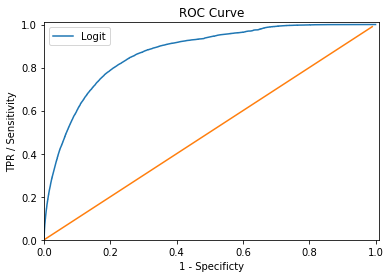

In [31]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_probs)

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_log,tpr_log)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['Logit'])
plt.show()

In [32]:
print('AUC-Logit=', auc(fpr_log, tpr_log))

AUC-Logit= 0.8699960790164769


In [33]:
joblib.dump(result, './Modelos/Ensamble/Ensamble_BoW-Otros_x2.sav')

['./Modelos/Ensamble/Ensamble_BoW-Otros_x2.sav']

In [35]:
X_train_2.to_csv("./Data/X_train_ensamble_final.csv", index=False )
X_test_2.to_csv("./Data/X_test_ensamble_final.csv", index=False )